In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import StandardScaler
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Stateless

In [ ]:
excel2 = pd.read_csv('/content/drive/MyDrive/2to0 Stateless.csv').sample(frac=1).reset_index(drop=True)

dless = pd.DataFrame(excel2)

dless.head(30)


<ipython-input-2-f4b2ef1ffaf3>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  excel2 = pd.read_csv('/content/drive/MyDrive/2to0 Stateless.csv').sample(frac=1).reset_index(drop=True)


,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,is_attack
0,33:54.5,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,0
1,31:09.4,21,3,0,19,0,3.052331,2,3,13,6.333333,diario,juarezadiario,17,1,0
2,37:12.6,26,9,0,10,10,2.742338,6,6,7,3.5,2,192,13,1,0
3,55:58.2,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,0
4,54:11.9,15,0,11,0,3,3.625,1,1,15,15.0,C,DESKTOP-3JF04TC,16,0,0
5,30:11.6,26,9,0,10,10,2.742338,6,6,7,3.5,2,192,13,1,0
6,38:49.5,32,0,32,0,0,2.735132,0,1,32,32.0,N,FHEPFCELEHFCEPFFFACACACACACACABN,33,0,0
7,18:08.8,11,0,0,10,0,2.375,1,2,7,5.0,bytes,vsbytes,8,0,0
8,36:26.2,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,0
9,16:53.2,14,0,0,12,0,2.595489,2,3,8,4.0,culture,iculture,9,0,0


In [ ]:
dless['longest_word'].fillna(0, inplace=True)

In [ ]:
numeric_columns = ['longest_word', 'sld']  # Replace with the actual column names

# Convert specified columns to numeric, coercing errors to NaN
for column in numeric_columns:
    dless[column] = pd.to_numeric(dless[column], errors='coerce')

# Drop rows with NaN values in the specified columns
dless = dless.dropna(subset=numeric_columns)
dless.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452917 entries, 1 to 757211
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         452917 non-null  object 
 1   FQDN_count        452917 non-null  object 
 2   subdomain_length  452917 non-null  object 
 3   upper             452917 non-null  object 
 4   lower             452917 non-null  object 
 5   numeric           452917 non-null  object 
 6   entropy           452917 non-null  object 
 7   special           452917 non-null  object 
 8   labels            452917 non-null  object 
 9   labels_max        452917 non-null  object 
 10  labels_average    452917 non-null  object 
 11  longest_word      452917 non-null  float64
 12  sld               452917 non-null  float64
 13  len               452917 non-null  object 
 14  subdomain         452917 non-null  object 
 15  is_attack         452917 non-null  int64  
dtypes: float64(2), int64(1), 

In [ ]:
dless['is_attack'].value_counts()

,count
is_attack,
0,714529
1,42683


In [ ]:
dless_clean = dless

In [ ]:
string_cols = dless_clean.select_dtypes(include='object').columns

for f1 in string_cols:
    if f1 != 'is_attack':
        dless_clean[f1] = dless_clean[f1].astype(str)
        dless_clean[f1] = le.fit_transform(dless_clean[f1])

dless_clean.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,is_attack
0,20346,18,2,0,1,3,190,6,5,28,38,2,301,4,1,0
1,18695,12,19,0,10,0,438,2,2,3,71,4135,30723,7,1,0
2,22327,17,25,0,1,2,260,6,5,28,36,2,301,3,1,0
3,33582,15,23,0,1,12,79,6,5,28,31,4,470,1,1,0
4,32519,5,0,1,0,7,960,1,0,5,15,11,1344,6,0,0


In [ ]:
def detect_outliers(df):
    outlier_mask = pd.Series([False] * len(df))
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Z-scores
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        # Identify outliers
        outliers_in_column = np.abs(z_scores) > 3
        outlier_mask = outlier_mask | outliers_in_column
    return outlier_mask

# Detect outliers in the dataset
outlier_mask = detect_outliers(dless)

# Filter out the outliers
dless_clean = dless[~outlier_mask]

print("Cleaned dataset without outliers:")
print(dless_clean)

Cleaned dataset without outliers:
        timestamp  FQDN_count  subdomain_length  upper  lower  numeric  \
0           12346          15                23      0      1       12   
1           29859          11                19      0      8        0   
2            9786          18                 2      0      1        3   
3            8042          18                 2      0      1        3   
4           25616          17                25      0      1        2   
...           ...         ...               ...    ...    ...      ...   
757206      33510           4                19      0      3        0   
757208      23340          18                 2      0      1        3   
757209      26400          15                23      0      1       12   
757210      17367           6                 0      0      6        0   
757211      25175           2                 0      0      1        0   

        entropy  special  labels  labels_max  labels_average  longest_word  \

In [ ]:
dless_clean = dless_clean.dropna()
dless_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757212 entries, 0 to 757211
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   timestamp         757212 non-null  int64
 1   FQDN_count        757212 non-null  int64
 2   subdomain_length  757212 non-null  int64
 3   upper             757212 non-null  int64
 4   lower             757212 non-null  int64
 5   numeric           757212 non-null  int64
 6   entropy           757212 non-null  int64
 7   special           757212 non-null  int64
 8   labels            757212 non-null  int64
 9   labels_max        757212 non-null  int64
 10  labels_average    757212 non-null  int64
 11  longest_word      757212 non-null  int64
 12  sld               757212 non-null  int64
 13  len               757212 non-null  int64
 14  subdomain         757212 non-null  int64
 15  is_attack         757212 non-null  int64
dtypes: int64(16)
memory usage: 92.4 MB


In [ ]:
dless_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694864 entries, 0 to 757211
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   timestamp         694864 non-null  int64
 1   FQDN_count        694864 non-null  int64
 2   subdomain_length  694864 non-null  int64
 3   upper             694864 non-null  int64
 4   lower             694864 non-null  int64
 5   numeric           694864 non-null  int64
 6   entropy           694864 non-null  int64
 7   special           694864 non-null  int64
 8   labels            694864 non-null  int64
 9   labels_max        694864 non-null  int64
 10  labels_average    694864 non-null  int64
 11  longest_word      694864 non-null  int64
 12  sld               694864 non-null  int64
 13  len               694864 non-null  int64
 14  subdomain         694864 non-null  int64
 15  is_attack         694864 non-null  int64
dtypes: int64(16)
memory usage: 90.1 MB


In [ ]:
dless_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
dless_clean.dropna(inplace=True)


In [ ]:
sc = StandardScaler()

dless_clean['is_attack'] = dless_clean['is_attack'].astype('object')
num_features = dless_clean.select_dtypes(include=['int', 'float']).columns

dless_clean[num_features] = sc.fit_transform(dless_clean[num_features])


In [ ]:
X = dless.drop(['is_attack'],axis = 1)
y = dless['is_attack']
#y = y.astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


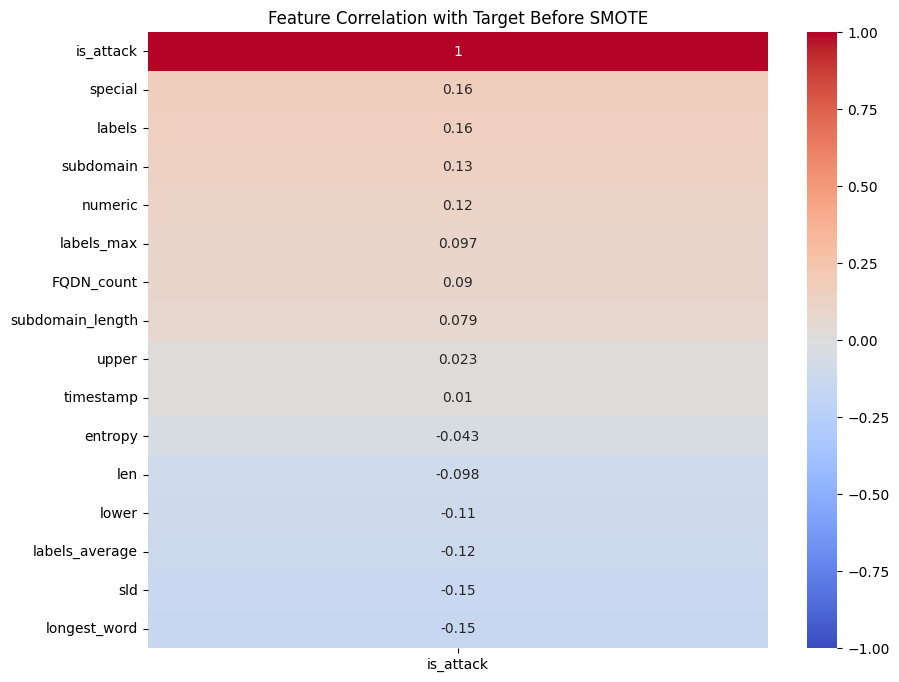

In [ ]:
train_data = X_train.copy()
train_data['is_attack'] = y_train

# Calculate correlation matrix
corr_matrix_before = train_data.corr()

# Plot heatmap for correlation before SMOTE
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_before[['is_attack']].sort_values(by='is_attack', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Target Before SMOTE')
plt.show()


In [ ]:
print(y_train.dtypes)
print(y_train.unique())
from sklearn.preprocessing import LabelEncoder

if y_train.dtypes == 'object':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)


int64
[0 1]


In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


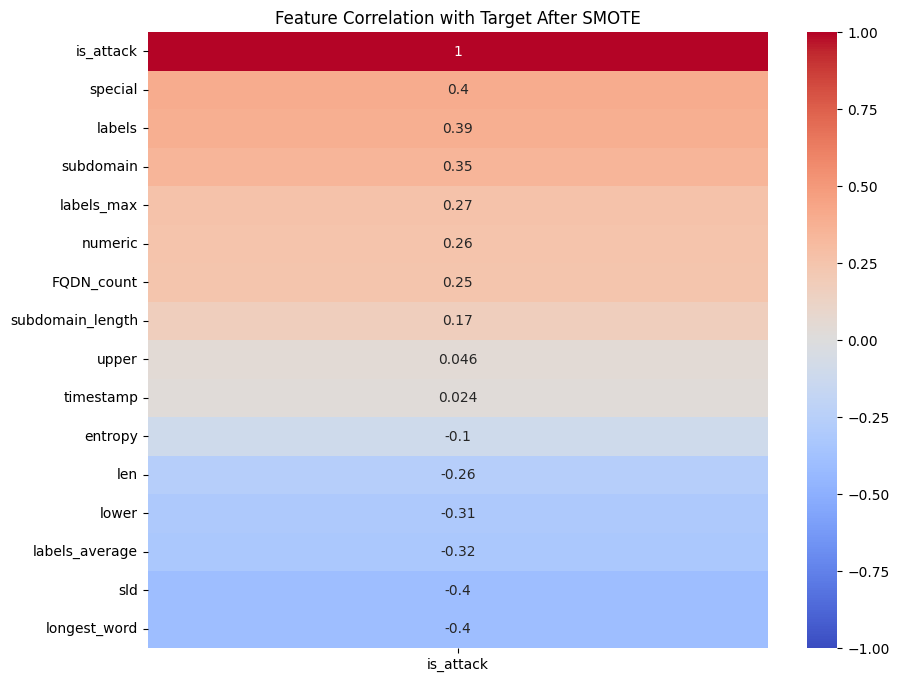

In [ ]:
train_res_data = X_train_res.copy()
train_res_data['is_attack'] = y_train_res

# Calculate correlation matrix
corr_matrix_after = train_res_data.corr()

# Plot heatmap for correlation after SMOTE
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_after[['is_attack']].sort_values(by='is_attack', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Target After SMOTE')
plt.show()

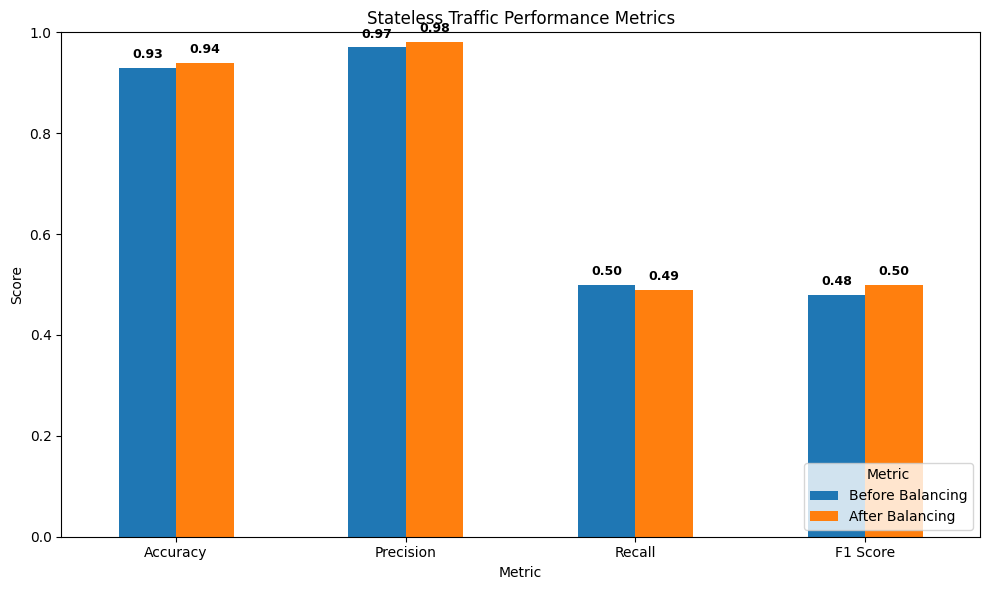

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to plot performance metrics with annotations and adjusted legend
def plot_performance_metrics(metrics_before, metrics_after, title):
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Before Balancing': metrics_before,
        'After Balancing': metrics_after
    })

    ax = metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(metrics_df['Metric'])))
    ax.set_xticklabels(metrics_df['Metric'], rotation=0)

    # Annotate each bar with the metric value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold',
                    xytext=(0, 5), textcoords='offset points')

    # Position the legend at the lower right inside the plot
    ax.legend(title='Metric', loc='lower right', bbox_to_anchor=(1, 0))

    plt.tight_layout()
    plt.show()

# Function to plot correlation heatmaps
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Example metrics before and after balancing for stateless data
metrics_stateless_before = [0.93, 0.97, 0.5, 0.48]  # Replace with actual values
metrics_stateless_after = [0.94, 0.98, 0.49, 0.50]   # Replace with actual values

# Plot performance metrics for stateless data
plot_performance_metrics(metrics_stateless_before, metrics_stateless_after, 'Stateless Traffic Performance Metrics')

# Repeat the above for stateful data with appropriate values
# ...


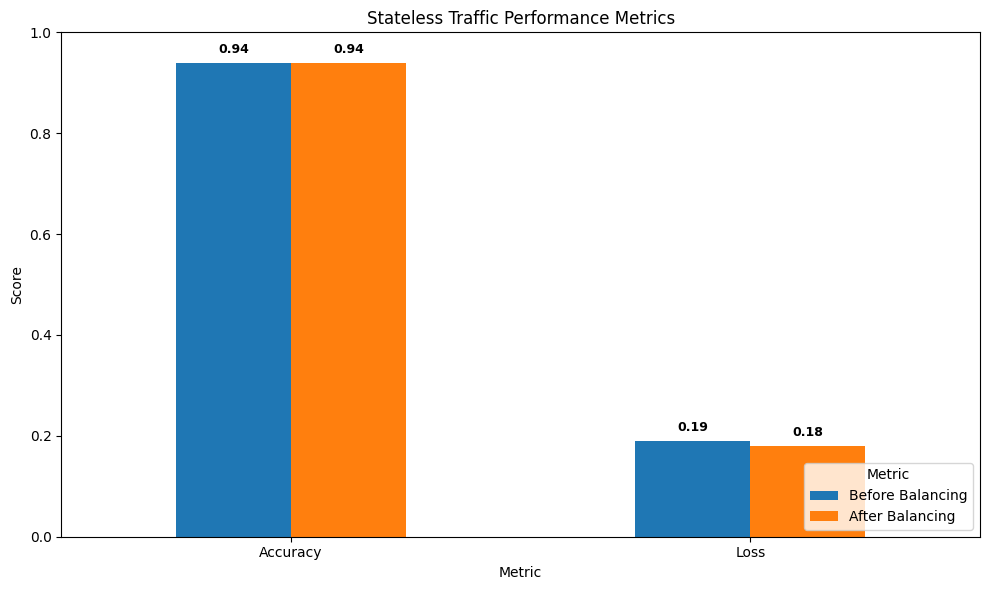

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to plot performance metrics with annotations and adjusted legend
def plot_performance_metrics(metrics_before, metrics_after, title):
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Loss'],
        'Before Balancing': metrics_before,
        'After Balancing': metrics_after
    })

    ax = metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(metrics_df['Metric'])))
    ax.set_xticklabels(metrics_df['Metric'], rotation=0)

    # Annotate each bar with the metric value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold',
                    xytext=(0, 5), textcoords='offset points')

    # Position the legend at the lower right inside the plot
    ax.legend(title='Metric', loc='lower right', bbox_to_anchor=(1, 0))

    plt.tight_layout()
    plt.show()

# Function to plot correlation heatmaps
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Example metrics before and after balancing for stateless data
metrics_stateless_before = [0.94, 0.19]  # Replace with actual values
metrics_stateless_after = [0.94, 0.18]   # Replace with actual values

# Plot performance metrics for stateless data
plot_performance_metrics(metrics_stateless_before, metrics_stateless_after, 'Stateless Traffic Performance Metrics')

# Repeat the above for stateful data with appropriate values
# ...


In [ ]:
estimator = LogisticRegression(max_iter=5000)

n_features_to_select = 8

selector = RFE(estimator, n_features_to_select=n_features_to_select)
selector = selector.fit(X_train, y_train)
log_selected_features_before = X.columns[selector.support_].tolist()
log_selected_features_before

['FQDN_count',
 'upper',
 'lower',
 'special',
 'labels',
 'labels_average',
 'len',
 'subdomain']

In [ ]:
estimator = LogisticRegression(max_iter=5000)

n_features_to_select = 8

selector = RFE(estimator, n_features_to_select=n_features_to_select)
selector = selector.fit(X_train_res, y_train_res)
log_selected_features_after = X.columns[selector.support_].tolist()
log_selected_features_after

['FQDN_count',
 'upper',
 'lower',
 'special',
 'labels',
 'labels_max',
 'labels_average',
 'subdomain']

In [ ]:
# Filter the training and test sets to include only the selected features
X_train_selected = X_train[log_selected_features_before]
X_test_selected = X_test[log_selected_features_before]


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape data to be 3D: [samples, timesteps, features]
def reshape_for_rnn(X):
    return np.expand_dims(X, axis=1)

# Preprocess data
X_train_rnn = reshape_for_rnn(X_train_selected)
X_test_rnn = reshape_for_rnn(X_test_selected)

# Normalize data
scaler = StandardScaler()
X_train_rnn = scaler.fit_transform(X_train_rnn.reshape(-1, X_train_rnn.shape[-1])).reshape(X_train_rnn.shape)
X_test_rnn = scaler.transform(X_test_rnn.reshape(-1, X_test_rnn.shape[-1])).reshape(X_test_rnn.shape)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print("RNN Accuracy:", accuracy)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16564/16564 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9390 - loss: 0.2093
Epoch 2/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9430 - loss: 0.1938
Epoch 3/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.9436 - loss: 0.1921
Epoch 4/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9433 - loss: 0.1926
Epoch 5/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9437 - loss: 0.1917
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9444 - loss: 0.1892
RNN Accuracy: 0.9442605376243591


In [ ]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = lstm_model.evaluate(X_test_rnn, y_test)
print("LSTM Accuracy:", accuracy)


Epoch 1/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9431 - loss: 0.2080
Epoch 2/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9428 - loss: 0.1932
Epoch 3/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.9432 - loss: 0.1920
Epoch 4/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9442 - loss: 0.1899
Epoch 5/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - accuracy: 0.9430 - loss: 0.1925
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9444 - loss: 0.1888
LSTM Accuracy: 0.9442649483680725


In [ ]:
from keras.layers import GRU

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
gru_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
gru_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = gru_model.evaluate(X_test_rnn, y_test)
print("GRU Accuracy:", accuracy)


Epoch 1/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.9434 - loss: 0.2047 - val_accuracy: 0.9433 - val_loss: 0.1921
Epoch 2/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9437 - loss: 0.1913 - val_accuracy: 0.9433 - val_loss: 0.1925
Epoch 3/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 62s 5ms/step - accuracy: 0.9436 - loss: 0.1913 - val_accuracy: 0.9433 - val_loss: 0.1921
Epoch 4/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 0.9433 - loss: 0.1919 - val_accuracy: 0.9433 - val_loss: 0.1914
Epoch 5/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - accuracy: 0.9434 - loss: 0.1917 - val_accuracy: 0.9433 - val_loss: 0.1915
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9444 - loss: 0.1890
GRU Accuracy: 0.9442649483680725


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Map the target labels: 2 -> 1
y_train_binary = y_train.replace(2, 1)
y_test_binary = y_test.replace(2, 1)

# Initialize the XGBoost classifier with binary logistic objective
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train[log_selected_features_before], y_train_binary)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test[log_selected_features_before])

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test_binary, y_pred_xgb)
precision_xgb = precision_score(y_test_binary, y_pred_xgb, average='macro', zero_division=1)
recall_xgb = recall_score(y_test_binary, y_pred_xgb, average='macro', zero_division=1)
f1_xgb = f1_score(y_test_binary, y_pred_xgb, average='macro', zero_division=1)

# Print the metrics
print("XGBoost Classifier")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)


XGBoost Classifier
Accuracy: 0.9442649363455478
Precision: 0.9721324681727739
Recall: 0.5
F1 Score: 0.4856668032703372


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Map the target labels: 2 -> 1
y_train_binary = y_train.replace(2, 1)
y_test_binary = y_test.replace(2, 1)

# Initialize the XGBoost classifier with binary logistic objective
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train[log_selected_features_after], y_train_binary)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test[log_selected_features_after])

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test_binary, y_pred_xgb)
precision_xgb = precision_score(y_test_binary, y_pred_xgb, average='macro', zero_division=1)
recall_xgb = recall_score(y_test_binary, y_pred_xgb, average='macro', zero_division=1)
f1_xgb = f1_score(y_test_binary, y_pred_xgb, average='macro', zero_division=1)

# Print the metrics
print("XGBoost Classifier")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)


XGBoost Classifier
Accuracy: 0.9442649363455478
Precision: 0.9721324681727739
Recall: 0.5
F1 Score: 0.4856668032703372


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[log_selected_features_before], y_train)
y_pred_logistic = logistic_model.predict(X_test[log_selected_features_before])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9442077089679702
Precision: 0.4721308732957372
Recall: 0.49996969739350966
F1 Score: 0.9856516639722497


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[log_selected_features_after], y_train)
y_pred_logistic = logistic_model.predict(X_test[log_selected_features_after])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9442077089679702
Precision: 0.4721308732957372
Recall: 0.49996969739350966
F1 Score: 0.9856516639722497


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(random_state=42, iterations=1000, silent=True)

# Fit the model
catboost_model.fit(X_train[log_selected_features_before], y_train)

# Predict on the test set
y_pred_catboost = catboost_model.predict(X_test[log_selected_features_before])

# Calculate metrics for CatBoost
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost, average='macro', zero_division=1)
recall_catboost = recall_score(y_test, y_pred_catboost, average='macro', zero_division=1)
f1_catboost = f1_score(y_test, y_pred_catboost, average='macro', zero_division=1)

print("CatBoost Classifier")
print("Accuracy:", accuracy_catboost)
print("Precision:", precision_catboost)
print("Recall:", recall_catboost)
print("F1 Score:", f1_catboost)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.2 MB/s eta 0:00:00
CatBoost Classifier
Accuracy: 0.9442649363455478
Precision: 0.9721324681727739
Recall: 0.5
F1 Score: 0.4856668032703372


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[log_selected_features_before], y_train)
y_pred_rf = rf_model.predict(X_test[log_selected_features_before])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9442649363455478
Precision: 0.9721324681727739
Recall: 0.5
F1 Score: 0.4856668032703372


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[log_selected_features_after], y_train)
y_pred_rf = rf_model.predict(X_test[log_selected_features_after])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9442649363455478
Precision: 0.9721324681727739
Recall: 0.5
F1 Score: 0.4856668032703372


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Initialize an empty set to store selected features
for_selected_features_before = set()

# Initialize a list to store performance
performance = []

while len(for_selected_features_before) < 8:
    best_feature = None
    best_score = -1

    for feature in X_train.columns:
        if feature not in for_selected_features_before:
            features_to_try = list(for_selected_features_before) + [feature]
            X_train_subset = X_train[features_to_try]
            X_test_subset = X_test[features_to_try]

            # Train your model (you can use any classifier)
            dt.fit(X_train_subset, y_train)
            y_pred = dt.predict(X_test_subset)

            # Evaluate performance
            score = accuracy_score(y_test, y_pred)

            if score > best_score:
                best_score = score
                best_feature = feature

    for_selected_features_before.add(best_feature)
    performance.append(best_score)

# Retrieve the selected features
for_selected_features_before = list(for_selected_features_before)
print("Selected Features:", for_selected_features_before)
print("Performance:", performance)

Selected Features: ['labels', 'lower', 'special', 'labels_max', 'upper', 'subdomain', 'longest_word', 'timestamp']
Performance: [0.9442649363455478, 0.9438687468084732, 0.9434373404236587, 0.9429883256149743, 0.9429883256149743, 0.9429971298269092, 0.9429751192970717, 0.9377806342554278]


In [ ]:
X_train_selected = X_train[for_selected_features_before]
X_test_selected = X_test[for_selected_features_before]

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape data to be 3D: [samples, timesteps, features]
def reshape_for_rnn(X):
    return np.expand_dims(X, axis=1)

# Preprocess data
X_train_rnn = reshape_for_rnn(X_train_selected)
X_test_rnn = reshape_for_rnn(X_test_selected)

# Normalize data
scaler = StandardScaler()
X_train_rnn = scaler.fit_transform(X_train_rnn.reshape(-1, X_train_rnn.shape[-1])).reshape(X_train_rnn.shape)
X_test_rnn = scaler.transform(X_test_rnn.reshape(-1, X_test_rnn.shape[-1])).reshape(X_test_rnn.shape)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print("RNN Accuracy:", accuracy)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16564/16564 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9404 - loss: 0.2105
Epoch 2/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9433 - loss: 0.1929
Epoch 3/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9437 - loss: 0.1918
Epoch 4/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9436 - loss: 0.1919
Epoch 5/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9432 - loss: 0.1930
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9444 - loss: 0.1896
RNN Accuracy: 0.9442605376243591


In [ ]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = lstm_model.evaluate(X_test_rnn, y_test)
print("LSTM Accuracy:", accuracy)


Epoch 1/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9420 - loss: 0.2100
Epoch 2/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9435 - loss: 0.1920
Epoch 3/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9437 - loss: 0.1913
Epoch 4/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9430 - loss: 0.1924
Epoch 5/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9432 - loss: 0.1920
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9444 - loss: 0.1885
LSTM Accuracy: 0.9442649483680725


In [ ]:
from keras.layers import GRU

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
gru_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
gru_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = gru_model.evaluate(X_test_rnn, y_test)
print("GRU Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 121s 9ms/step - accuracy: 0.9405 - loss: 0.2084 - val_accuracy: 0.9433 - val_loss: 0.1927
Epoch 2/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - accuracy: 0.9439 - loss: 0.1910 - val_accuracy: 0.9433 - val_loss: 0.1926
Epoch 3/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 92s 6ms/step - accuracy: 0.9434 - loss: 0.1918 - val_accuracy: 0.9433 - val_loss: 0.1917
Epoch 4/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - accuracy: 0.9434 - loss: 0.1918 - val_accuracy: 0.9433 - val_loss: 0.1917
Epoch 5/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - accuracy: 0.9435 - loss: 0.1916 - val_accuracy: 0.9433 - val_loss: 0.1916
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9444 - loss: 0.1890
GRU Accuracy: 0.9442649483680725


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train[for_selected_features_before], y_train)
y_pred_xgb = xgb_model.predict(X_test[for_selected_features_before])

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro', zero_division=1)

print("XGBoost Classifier")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

XGBoost Classifier
Accuracy: 0.9442649363455478
Precision: 0.9721324681727739
Recall: 0.5
F1 Score: 0.4856668032703372


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[for_selected_features_before], y_train)
y_pred_logistic = logistic_model.predict(X_test[for_selected_features_before])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9432084309133489
Precision: 0.9716042154566744
Recall: 0.5
F1 Score: 0.48538716480867733


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[for_selected_features_before], y_train)
y_pred_rf = rf_model.predict(X_test[for_selected_features_before])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9338583578383899
Precision: 0.5498778867015778
Recall: 0.5124537187196139
F1 Score: 0.5127722698194884


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Initialize an empty set to store selected features
for_selected_features_after = set()

# Initialize a list to store performance
performance = []

while len(for_selected_features_after) < 8:
    best_feature = None
    best_score = -1

    for feature in X_train_res.columns:
        if feature not in for_selected_features_after:
            features_to_try = list(for_selected_features_after) + [feature]
            X_train_res_subset = X_train_res[features_to_try]
            X_test_subset = X_test[features_to_try]

            # Train your model (you can use any classifier)
            dt.fit(X_train_res_subset, y_train_res)
            y_pred = dt.predict(X_test_subset)

            # Evaluate performance
            score = accuracy_score(y_test, y_pred)

            if score > best_score:
                best_score = score
                best_feature = feature

    for_selected_features_after.add(best_feature)
    performance.append(best_score)

# Retrieve the selected features
for_selected_features_after = list(for_selected_features_after)
print("Selected Features:", for_selected_features_after)
print("Performance:", performance)

Selected Features: ['labels_average', 'subdomain_length', 'entropy', 'upper', 'FQDN_count', 'subdomain', 'numeric', 'timestamp']
Performance: [0.9197848250603089, 0.5847449419802433, 0.7650287897730275, 0.7672518532866123, 0.7674455459491821, 0.767480762796922, 0.7672826680283847, 0.7673531017238647]


In [ ]:
X_train_selected = X_train[for_selected_features_after]
X_test_selected = X_test[for_selected_features_after]

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape data to be 3D: [samples, timesteps, features]
def reshape_for_rnn(X):
    return np.expand_dims(X, axis=1)

# Preprocess data
X_train_rnn = reshape_for_rnn(X_train_selected)
X_test_rnn = reshape_for_rnn(X_test_selected)

# Normalize data
scaler = StandardScaler()
X_train_rnn = scaler.fit_transform(X_train_rnn.reshape(-1, X_train_rnn.shape[-1])).reshape(X_train_rnn.shape)
X_test_rnn = scaler.transform(X_test_rnn.reshape(-1, X_test_rnn.shape[-1])).reshape(X_test_rnn.shape)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print("RNN Accuracy:", accuracy)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16564/16564 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9384 - loss: 0.2119
Epoch 2/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9437 - loss: 0.1924
Epoch 3/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9433 - loss: 0.1929
Epoch 4/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9436 - loss: 0.1922
Epoch 5/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9430 - loss: 0.1933
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9444 - loss: 0.1890
RNN Accuracy: 0.9442649483680725


In [ ]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = lstm_model.evaluate(X_test_rnn, y_test)
print("LSTM Accuracy:", accuracy)


Epoch 1/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9410 - loss: 0.2114
Epoch 2/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - accuracy: 0.9430 - loss: 0.1928
Epoch 3/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.9437 - loss: 0.1912
Epoch 4/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.9433 - loss: 0.1918
Epoch 5/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.9435 - loss: 0.1911
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9444 - loss: 0.1890
LSTM Accuracy: 0.9442649483680725


In [ ]:

from keras.layers import GRU

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
gru_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
gru_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = gru_model.evaluate(X_test_rnn, y_test)
print("GRU Accuracy:", accuracy)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13252/13252 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.9393 - loss: 0.2114 - val_accuracy: 0.9433 - val_loss: 0.1931
Epoch 2/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9433 - loss: 0.1926 - val_accuracy: 0.9433 - val_loss: 0.1919
Epoch 3/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.9431 - loss: 0.1927 - val_accuracy: 0.9433 - val_loss: 0.1916
Epoch 4/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9432 - loss: 0.1921 - val_accuracy: 0.9433 - val_loss: 0.1914
Epoch 5/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - accuracy: 0.9434 - loss: 0.1918 - val_accuracy: 0.9433 - val_loss: 0.1915
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9444 - loss: 0.1887
GRU Accuracy: 0.9442649483680725


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train[for_selected_features_after], y_train)
y_pred_xgb = xgb_model.predict(X_test[for_selected_features_after])

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro', zero_division=1)

print("XGBoost Classifier")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

XGBoost Classifier
Accuracy: 0.9432084309133489
Precision: 0.7216081176263427
Recall: 0.5000728462096707
F1 Score: 0.48554201108339556


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[for_selected_features_after], y_train)
y_pred_logistic = logistic_model.predict(X_test[for_selected_features_after])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9432084309133489
Precision: 0.9716042154566744
Recall: 0.5
F1 Score: 0.48538716480867733


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[for_selected_features_after], y_train)
y_pred_rf = rf_model.predict(X_test[for_selected_features_after])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9283821380148263
Precision: 0.5737689123873908
Recall: 0.5332621855854864
F1 Score: 0.5422724608585862


In [ ]:
from sklearn.linear_model import Ridge

alpha = 0.1
# Assuming X is your feature matrix and y is your target variable
# and alpha is the regularization strength
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)
coefficients = model.coef_
ridge_selected_features_before = X.columns[coefficients != 0].tolist()
ridge_selected_features_before

['timestamp',
 'FQDN_count',
 'subdomain_length',
 'upper',
 'lower',
 'numeric',
 'entropy',
 'special',
 'labels',
 'labels_max',
 'labels_average',
 'longest_word',
 'sld',
 'len',
 'subdomain']

In [ ]:
from sklearn.linear_model import Ridge

alpha = 0.1
# Assuming X is your feature matrix and y is your target variable
# and alpha is the regularization strength
model = Ridge(alpha=alpha)
model.fit(X_train_res, y_train_res)
coefficients = model.coef_
ridge_selected_features_after = X.columns[coefficients != 0].tolist()
ridge_selected_features_after

['timestamp',
 'FQDN_count',
 'subdomain_length',
 'upper',
 'lower',
 'numeric',
 'entropy',
 'special',
 'labels',
 'labels_max',
 'labels_average',
 'longest_word',
 'sld',
 'len',
 'subdomain']

In [ ]:
X_train_selected = X_train[ridge_selected_features_after]
X_test_selected = X_test[ridge_selected_features_after]

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape data to be 3D: [samples, timesteps, features]
def reshape_for_rnn(X):
    return np.expand_dims(X, axis=1)

# Preprocess data
X_train_rnn = reshape_for_rnn(X_train_selected)
X_test_rnn = reshape_for_rnn(X_test_selected)

# Normalize data
scaler = StandardScaler()
X_train_rnn = scaler.fit_transform(X_train_rnn.reshape(-1, X_train_rnn.shape[-1])).reshape(X_train_rnn.shape)
X_test_rnn = scaler.transform(X_test_rnn.reshape(-1, X_test_rnn.shape[-1])).reshape(X_test_rnn.shape)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print("RNN Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9374 - loss: 0.2115
Epoch 2/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 86s 3ms/step - accuracy: 0.9433 - loss: 0.1931
Epoch 3/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.9437 - loss: 0.1918
Epoch 4/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9432 - loss: 0.1929
Epoch 5/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9435 - loss: 0.1918
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9444 - loss: 0.1894
RNN Accuracy: 0.9442649483680725


In [ ]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = lstm_model.evaluate(X_test_rnn, y_test)
print("LSTM Accuracy:", accuracy)


Epoch 1/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.9429 - loss: 0.2036
Epoch 2/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.9437 - loss: 0.1910
Epoch 3/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.9430 - loss: 0.1922
Epoch 4/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.9435 - loss: 0.1913
Epoch 5/5
16564/16564 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.9427 - loss: 0.1930
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9444 - loss: 0.1889
LSTM Accuracy: 0.9442649483680725


In [ ]:

from keras.layers import GRU

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
gru_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
gru_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = gru_model.evaluate(X_test_rnn, y_test)
print("GRU Accuracy:", accuracy)


Epoch 1/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.9422 - loss: 0.2027 - val_accuracy: 0.9433 - val_loss: 0.1919
Epoch 2/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.9442 - loss: 0.1901 - val_accuracy: 0.9433 - val_loss: 0.1919
Epoch 3/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - accuracy: 0.9437 - loss: 0.1911 - val_accuracy: 0.9433 - val_loss: 0.1915
Epoch 4/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - accuracy: 0.9440 - loss: 0.1901 - val_accuracy: 0.9433 - val_loss: 0.1914
Epoch 5/5
13252/13252 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9434 - loss: 0.1914 - val_accuracy: 0.9433 - val_loss: 0.1918
7099/7099 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9444 - loss: 0.1890
GRU Accuracy: 0.9442649483680725


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

xgb_model.fit(X_train[ridge_selected_features_before], y_train)
y_pred = xgb_model.predict(X_test[ridge_selected_features_before])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9432128330193165
Precision: 0.9716062915175447
Recall: 0.5000387566855282
F1 Score: 0.48546577176085615


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

xgb_model.fit(X_train[ridge_selected_features_after], y_train)
y_pred = xgb_model.predict(X_test[ridge_selected_features_after])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9432128330193165
Precision: 0.9716062915175447
Recall: 0.5000387566855282
F1 Score: 0.48546577176085615


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[ridge_selected_features_before], y_train)
y_pred_logistic = logistic_model.predict(X_test[ridge_selected_features_before])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9432084309133489
Precision: 0.9716042154566744
Recall: 0.5
F1 Score: 0.48538716480867733


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[ridge_selected_features_after], y_train)
y_pred_logistic = logistic_model.predict(X_test[ridge_selected_features_after])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9432084309133489
Precision: 0.9716042154566744
Recall: 0.5
F1 Score: 0.48538716480867733


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[ridge_selected_features_before], y_train)
y_pred_rf = rf_model.predict(X_test[ridge_selected_features_before])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9283821380148263
Precision: 0.5737689123873908
Recall: 0.5332621855854864
F1 Score: 0.5422724608585862


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[ridge_selected_features_after], y_train)
y_pred_rf = rf_model.predict(X_test[ridge_selected_features_after])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9283821380148263
Precision: 0.5737689123873908
Recall: 0.5332621855854864
F1 Score: 0.5422724608585862


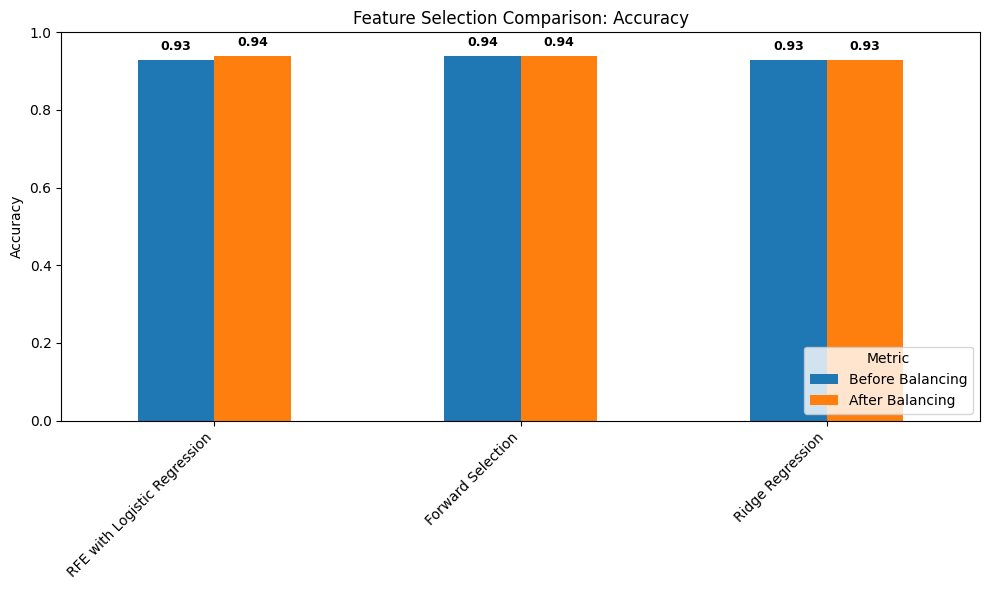

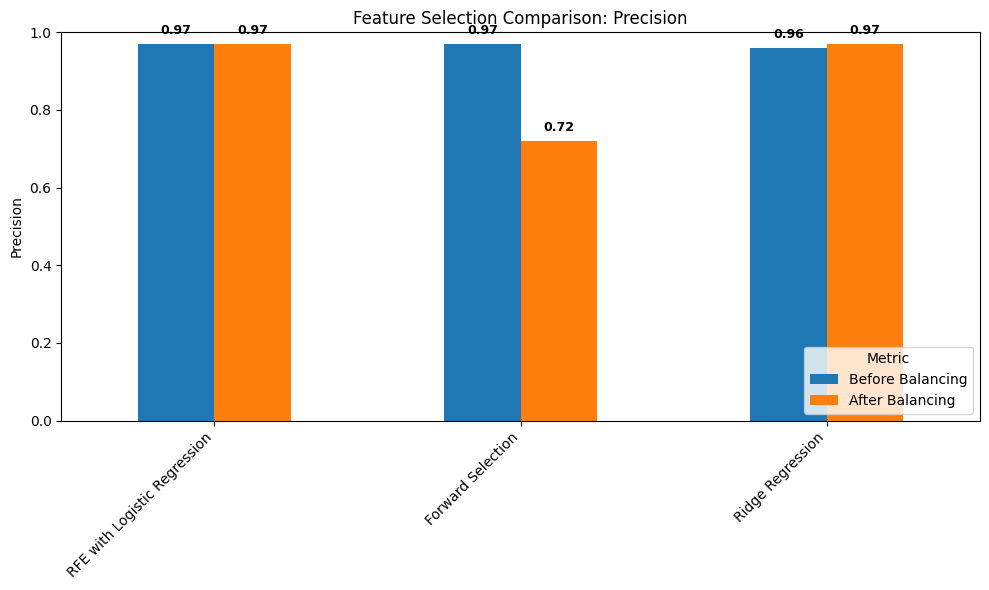

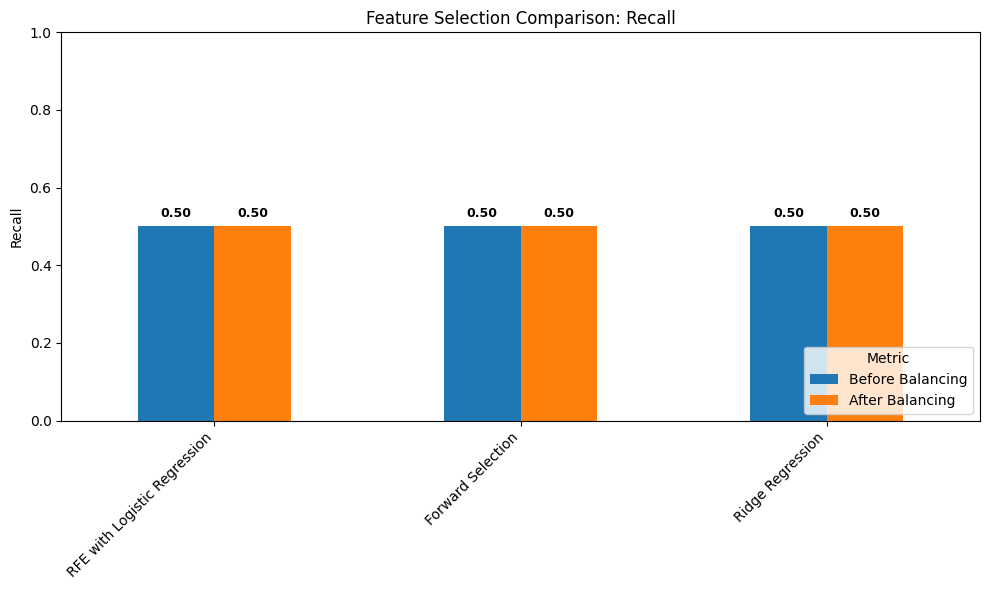

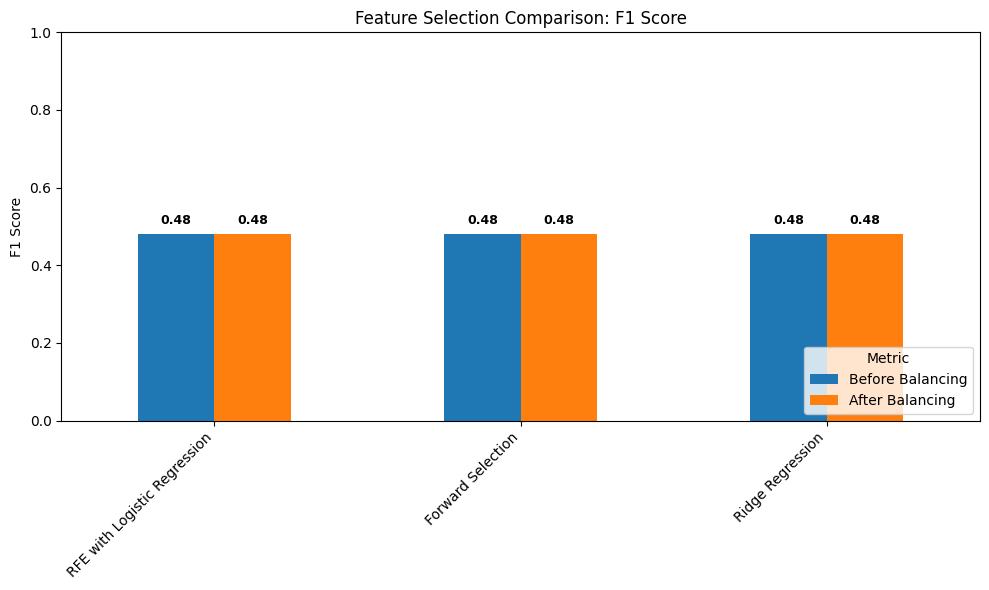

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot feature selection performance metrics with annotations
def plot_feature_selection_comparison(methods, metrics, metric_name, title):
    metrics_df = pd.DataFrame(metrics, index=methods, columns=['Before Balancing', 'After Balancing'])

    ax = metrics_df.plot(kind='bar', figsize=(10, 6))
    ax.set_title(title)
    ax.set_ylabel(metric_name)
    ax.set_ylim(0, 1)
    ax.set_xticklabels(methods, rotation=45, ha='right')

    # Annotate each bar with the metric value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold',
                    xytext=(0, 5), textcoords='offset points')

    # Position the legend at the lower right inside the plot
    ax.legend(title='Metric', loc='lower right', bbox_to_anchor=(1, 0))

    plt.tight_layout()
    plt.show()

# Feature selection method names
feature_selection_methods = ['RFE with Logistic Regression', 'Forward Selection', 'Ridge Regression']  # Replace Method 2 and 3 with actual names

# Replace these example metrics with actual performance results for each method
accuracy_before = [0.93, 0.94, 0.93]  # Update these lists with your actual data
accuracy_after = [0.94, 0.94, 0.93]

precision_before = [0.97, 0.97, 0.96]
precision_after = [0.97, 0.72, 0.97]

recall_before = [0.50, 0.50, 0.50]
recall_after = [0.50, 0.50, 0.50]

f1_before = [0.48, 0.48, 0.48]
f1_after = [0.48, 0.48, 0.48]

# Plot performance metrics for each feature selection method
plot_feature_selection_comparison(feature_selection_methods, list(zip(accuracy_before, accuracy_after)), 'Accuracy', 'Feature Selection Comparison: Accuracy')
plot_feature_selection_comparison(feature_selection_methods, list(zip(precision_before, precision_after)), 'Precision', 'Feature Selection Comparison: Precision')
plot_feature_selection_comparison(feature_selection_methods, list(zip(recall_before, recall_after)), 'Recall', 'Feature Selection Comparison: Recall')
plot_feature_selection_comparison(feature_selection_methods, list(zip(f1_before, f1_after)), 'F1 Score', 'Feature Selection Comparison: F1 Score')


# Stateful

In [ ]:
excel1 = pd.read_csv('/content/drive/MyDrive/2to0 Stateful.csv')

dful = pd.DataFrame(excel1)

dful.head()

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,...,distinct_ip,unique_country,unique_asn,distinct_domains,reverse_dns,a_records,unique_ttl,ttl_mean,ttl_variance,is_attack
0,0.0,0,0,0,0,0,6,0,0,0,...,set(),set(),set(),{},unknown,0,"[1, 1, 1, 1, 1, 1]",1.0,0.0,0
1,0.0,0,0,0,0,0,8,0,0,0,...,set(),set(),set(),{},unknown,0,"[1, 1, 1, 1, 1, 1, 1, 1]",1.0,0.0,0
2,0.0,0,0,0,0,0,10,0,0,0,...,set(),set(),set(),{},unknown,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,0.0,0
3,0.0,0,0,0,0,0,6,0,0,0,...,set(),set(),set(),{},unknown,0,"[1, 1, 1, 1, 1, 1]",1.0,0.0,0
4,0.0,0,0,0,0,0,3,0,0,0,...,set(),set(),set(),{},unknown,0,"[1, 1, 1]",1.0,0.0,0


In [ ]:
# prompt: i need the column unique_ttl to be replaced with each row with the average of the lists in it

import numpy as np
# Calculate the average of each list in 'unique_ttl' column
dful['unique_ttl'] = dful['unique_ttl'].apply(lambda x: np.mean(eval(x)) if isinstance(eval(x), list) else x)


In [ ]:
dful

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,...,distinct_ip,unique_country,unique_asn,distinct_domains,reverse_dns,a_records,unique_ttl,ttl_mean,ttl_variance,is_attack
0,0.0,0,0,0,0,0,6,0,0,0,...,set(),set(),set(),{},unknown,0,1.0,1.0,0.0,0
1,0.0,0,0,0,0,0,8,0,0,0,...,set(),set(),set(),{},unknown,0,1.0,1.0,0.0,0
2,0.0,0,0,0,0,0,10,0,0,0,...,set(),set(),set(),{},unknown,0,1.0,1.0,0.0,0
3,0.0,0,0,0,0,0,6,0,0,0,...,set(),set(),set(),{},unknown,0,1.0,1.0,0.0,0
4,0.0,0,0,0,0,0,3,0,0,0,...,set(),set(),set(),{},unknown,0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262100,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),set(),{},unknown,0,1.0,1.0,0.0,0
262101,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),set(),{},unknown,0,1.0,1.0,0.0,0
262102,0.0,0,0,0,0,0,8,0,0,0,...,set(),set(),set(),{},unknown,0,1.0,1.0,0.0,0
262103,0.0,0,0,0,0,0,1,0,0,0,...,set(),set(),set(),{},unknown,0,255.0,255.0,0.0,0


In [ ]:
dful.columns

Index(['rr', 'A_frequency', 'NS_frequency', 'CNAME_frequency', 'SOA_frequency',
       'NULL_frequency', 'PTR_frequency', 'HINFO_frequency', 'MX_frequency',
       'TXT_frequency', 'AAAA_frequency', 'SRV_frequency', 'OPT_frequency',
       'rr_type', 'rr_count', 'rr_name_entropy', 'rr_name_length',
       'distinct_ns', 'distinct_ip', 'unique_country', 'unique_asn',
       'distinct_domains', 'reverse_dns', 'a_records', 'unique_ttl',
       'ttl_mean', 'ttl_variance', 'is_attack'],
      dtype='object')

In [ ]:
dful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262105 entries, 0 to 262104
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rr                262105 non-null  float64
 1   A_frequency       262105 non-null  int64  
 2   NS_frequency      262105 non-null  int64  
 3   CNAME_frequency   262105 non-null  int64  
 4   SOA_frequency     262105 non-null  int64  
 5   NULL_frequency    262105 non-null  int64  
 6   PTR_frequency     262105 non-null  int64  
 7   HINFO_frequency   262105 non-null  int64  
 8   MX_frequency      262105 non-null  int64  
 9   TXT_frequency     262105 non-null  int64  
 10  AAAA_frequency    262105 non-null  int64  
 11  SRV_frequency     262105 non-null  int64  
 12  OPT_frequency     262105 non-null  int64  
 13  rr_type           262105 non-null  object 
 14  rr_count          262105 non-null  int64  
 15  rr_name_entropy   262105 non-null  float64
 16  rr_name_length    26

In [ ]:
string_cols = dful.select_dtypes(include='object').columns

for f1 in string_cols:
    if f1 != 'is_attack':
        dful[f1] = dful[f1].astype(str)
        dful[f1] = le.fit_transform(dful[f1])

dful.head()

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,...,distinct_ip,unique_country,unique_asn,distinct_domains,reverse_dns,a_records,unique_ttl,ttl_mean,ttl_variance,is_attack
0,0.0,0,0,0,0,0,6,0,0,0,...,0,0,0,57657,19965,0,1.0,1.0,0.0,0
1,0.0,0,0,0,0,0,8,0,0,0,...,0,0,0,57657,19965,0,1.0,1.0,0.0,0
2,0.0,0,0,0,0,0,10,0,0,0,...,0,0,0,57657,19965,0,1.0,1.0,0.0,0
3,0.0,0,0,0,0,0,6,0,0,0,...,0,0,0,57657,19965,0,1.0,1.0,0.0,0
4,0.0,0,0,0,0,0,3,0,0,0,...,0,0,0,57657,19965,0,1.0,1.0,0.0,0


In [ ]:
sc = StandardScaler()

dful['is_attack'] = dful['is_attack'].astype('object')
num_features = dful.select_dtypes(include=['int', 'float']).columns

dful[num_features] = sc.fit_transform(dful[num_features])

In [ ]:
dful = dful.drop(['AAAA_frequency', 'A_frequency','PTR_frequency','TXT_frequency','NS_frequency', 'CNAME_frequency', 'SOA_frequency', 'NULL_frequency', 'HINFO_frequency', 'MX_frequency', 'SRV_frequency', 'OPT_frequency'], axis = 1)


In [ ]:
dful.head()

,rr,rr_type,rr_count,rr_name_entropy,rr_name_length,distinct_ns,distinct_ip,unique_country,unique_asn,distinct_domains,reverse_dns,a_records,unique_ttl,ttl_mean,ttl_variance,is_attack
0,-0.783443,0.895801,-0.559915,0.786689,0.881473,-0.579366,0.0,-0.516239,-0.442982,0.484201,0.308148,0.0,-0.99317,-0.99317,-0.539689,0
1,-0.783443,0.895801,-0.559915,0.882866,1.029673,-0.579366,0.0,-0.516239,-0.442982,0.484201,0.308148,0.0,-0.99317,-0.99317,-0.539689,0
2,-0.783443,0.895801,-0.559915,0.573533,0.585072,-0.579366,0.0,-0.516239,-0.442982,0.484201,0.308148,0.0,-0.99317,-0.99317,-0.539689,0
3,-0.783443,0.895801,-0.559915,0.880169,1.029673,-0.579366,0.0,-0.516239,-0.442982,0.484201,0.308148,0.0,-0.99317,-0.99317,-0.539689,0
4,-0.783443,0.895801,-0.559915,0.880735,1.029673,-0.579366,0.0,-0.516239,-0.442982,0.484201,0.308148,0.0,-0.99317,-0.99317,-0.539689,0


In [ ]:
dful['is_attack'] = dful['is_attack'].astype('int')

In [ ]:
dful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262105 entries, 0 to 262104
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rr                262105 non-null  float64
 1   rr_type           262105 non-null  float64
 2   rr_count          262105 non-null  float64
 3   rr_name_entropy   262105 non-null  float64
 4   rr_name_length    262105 non-null  float64
 5   distinct_ns       262105 non-null  float64
 6   distinct_ip       262105 non-null  float64
 7   unique_country    262105 non-null  float64
 8   unique_asn        262105 non-null  float64
 9   distinct_domains  262105 non-null  float64
 10  reverse_dns       262105 non-null  float64
 11  a_records         262105 non-null  float64
 12  unique_ttl        262105 non-null  float64
 13  ttl_mean          262105 non-null  float64
 14  ttl_variance      262105 non-null  float64
 15  is_attack         262105 non-null  int64  
dtypes: float64(15), int6

In [ ]:
X = dful.drop('is_attack', axis=1)
y = dful['is_attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


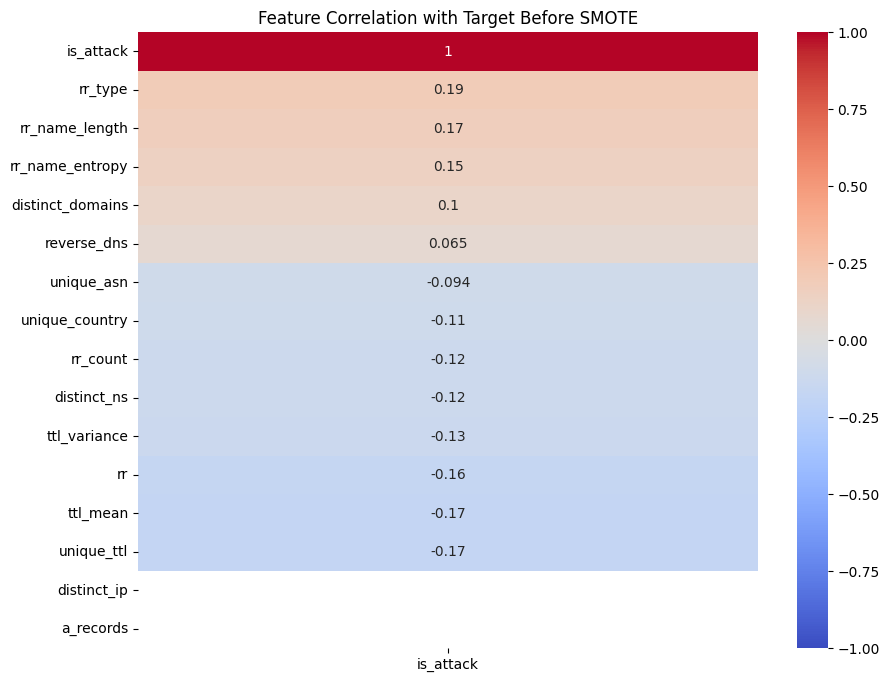

In [ ]:
train_data = X_train.copy()
train_data['is_attack'] = y_train

# Calculate correlation matrix
corr_matrix_before = train_data.corr()

# Plot heatmap for correlation before SMOTE
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_before[['is_attack']].sort_values(by='is_attack', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Target Before SMOTE')
plt.show()


In [ ]:
print(y_train.dtypes)
print(y_train.unique())
from sklearn.preprocessing import LabelEncoder

if y_train.dtypes == 'object':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)


int64
[0 1]


In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
# prompt: give me a code that counts the unique classes of y_train and how many instances are in each class

import numpy as np
unique, counts = np.unique(y_train_res, return_counts=True)
for u, c in zip(unique, counts):
  print("Class: ", u, "Count: ", c)


Class:  0 Count:  175592
Class:  1 Count:  175592


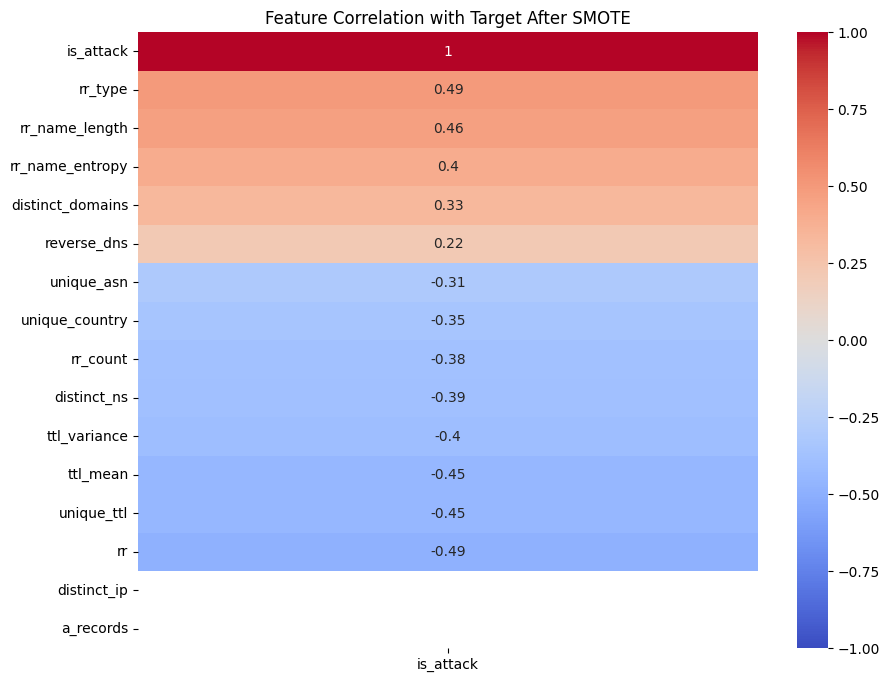

In [ ]:
train_res_data = X_train_res.copy()
train_res_data['is_attack'] = y_train_res

# Calculate correlation matrix
corr_matrix_after = train_res_data.corr()

# Plot heatmap for correlation after SMOTE
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_after[['is_attack']].sort_values(by='is_attack', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Target After SMOTE')
plt.show()

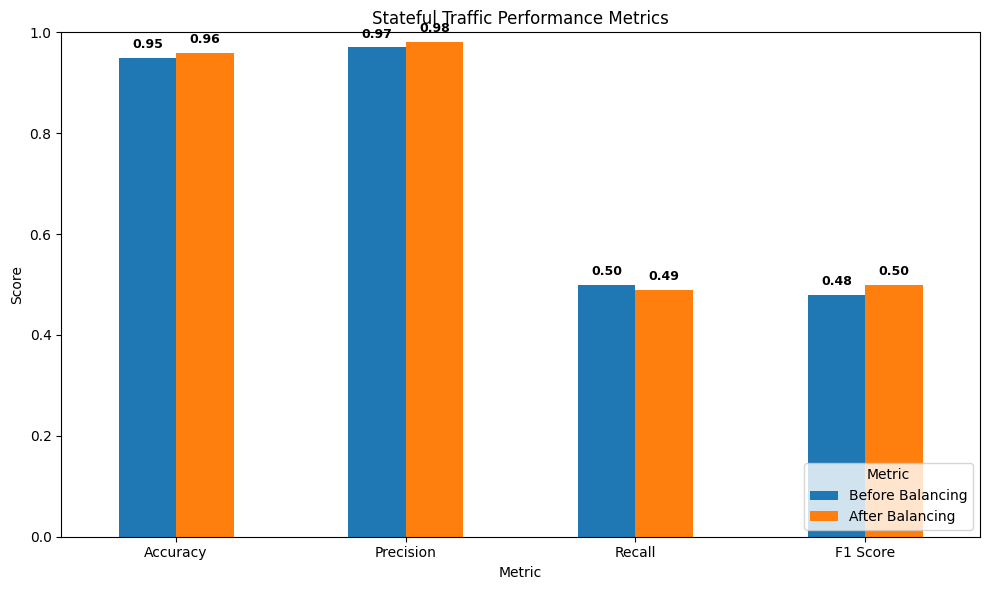

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to plot performance metrics with annotations and adjusted legend
def plot_performance_metrics(metrics_before, metrics_after, title):
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Before Balancing': metrics_before,
        'After Balancing': metrics_after
    })

    ax = metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(metrics_df['Metric'])))
    ax.set_xticklabels(metrics_df['Metric'], rotation=0)

    # Annotate each bar with the metric value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold',
                    xytext=(0, 5), textcoords='offset points')

    # Position the legend at the lower right inside the plot
    ax.legend(title='Metric', loc='lower right', bbox_to_anchor=(1, 0))

    plt.tight_layout()
    plt.show()

# Function to plot correlation heatmaps
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Example metrics before and after balancing for stateful data
metrics_stateful_before = [0.95, 0.97, 0.5, 0.48]  # Replace with actual values
metrics_stateful_after = [0.96, 0.98, 0.49, 0.50]   # Replace with actual values

# Plot performance metrics for stateful data
plot_performance_metrics(metrics_stateful_before, metrics_stateful_after, 'Stateful Traffic Performance Metrics')


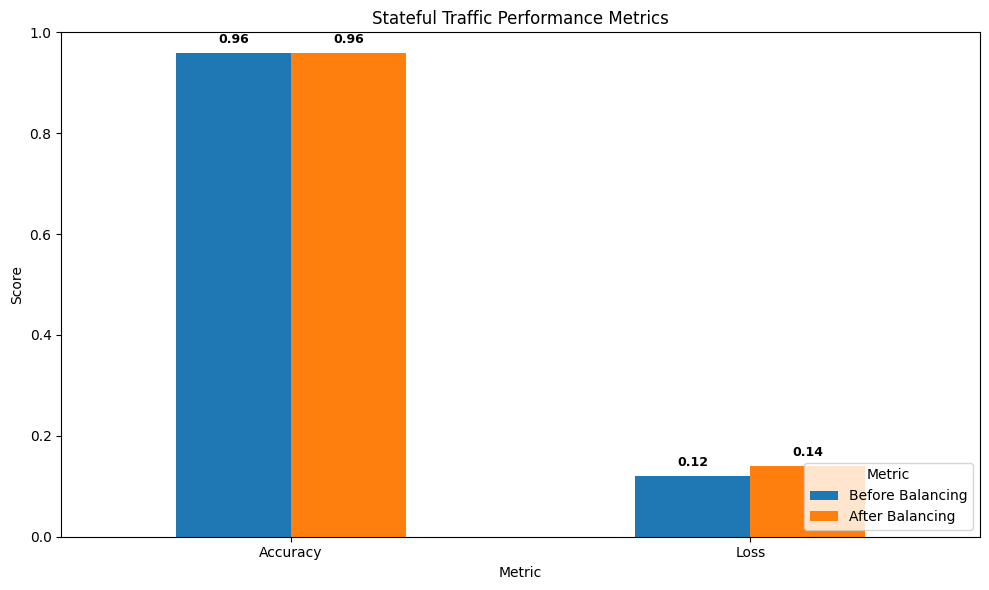

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to plot performance metrics with annotations and adjusted legend
def plot_performance_metrics(metrics_before, metrics_after, title):
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Loss'],
        'Before Balancing': metrics_before,
        'After Balancing': metrics_after
    })

    ax = metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(metrics_df['Metric'])))
    ax.set_xticklabels(metrics_df['Metric'], rotation=0)

    # Annotate each bar with the metric value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold',
                    xytext=(0, 5), textcoords='offset points')

    # Position the legend at the lower right inside the plot
    ax.legend(title='Metric', loc='lower right', bbox_to_anchor=(1, 0))

    plt.tight_layout()
    plt.show()

# Function to plot correlation heatmaps
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Example metrics before and after balancing for stateful data
metrics_stateful_before = [0.96, 0.12]  # Replace with actual values
metrics_stateful_after = [0.96, 0.14]   # Replace with actual values

# Plot performance metrics for stateful data
plot_performance_metrics(metrics_stateful_before, metrics_stateful_after, 'Stateful Traffic Performance Metrics')


In [ ]:
#Correlation coeffecient before SMOTE

correlation_with_target_before = train_data.corr()['is_attack'].abs().sort_values(ascending=False)
selected_features_before = correlation_with_target_before[correlation_with_target_before > 0.1].index.tolist()
selected_features_before.remove('is_attack')
print(selected_features_before)

['rr_type', 'unique_ttl', 'ttl_mean', 'rr_name_length', 'rr', 'rr_name_entropy', 'ttl_variance', 'distinct_ns', 'rr_count', 'unique_country', 'distinct_domains']


In [ ]:
#Correlation coeffecient after SMOTE

correlation_with_target_after = train_res_data.corr()['is_attack'].abs().sort_values(ascending=False)
selected_features_after = correlation_with_target_after[correlation_with_target_after > 0.1].index.tolist()
selected_features_after.remove('is_attack')
print(selected_features_after)


['rr_type', 'rr', 'rr_name_length', 'unique_ttl', 'ttl_mean', 'rr_name_entropy', 'ttl_variance', 'distinct_ns', 'rr_count', 'unique_country', 'distinct_domains', 'unique_asn', 'reverse_dns']


In [ ]:
# Filter the training and test sets to include only the selected features
X_train_selected = X_train[selected_features_before]
X_test_selected = X_test[selected_features_before]


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape data to be 3D: [samples, timesteps, features]
def reshape_for_rnn(X):
    return np.expand_dims(X, axis=1)

# Preprocess data
X_train_rnn = reshape_for_rnn(X_train_selected)
X_test_rnn = reshape_for_rnn(X_test_selected)

# Normalize data
scaler = StandardScaler()
X_train_rnn = scaler.fit_transform(X_train_rnn.reshape(-1, X_train_rnn.shape[-1])).reshape(X_train_rnn.shape)
X_test_rnn = scaler.transform(X_test_rnn.reshape(-1, X_test_rnn.shape[-1])).reshape(X_test_rnn.shape)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print("RNN Accuracy:", accuracy)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5734/5734 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9491 - loss: 0.1968
Epoch 2/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9576 - loss: 0.1489
Epoch 3/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9565 - loss: 0.1517
Epoch 4/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9578 - loss: 0.1479
Epoch 5/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9557 - loss: 0.1531
2458/2458 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9580 - loss: 0.1463
RNN Accuracy: 0.9565825462341309


In [ ]:
from keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = lstm_model.evaluate(X_test_rnn, y_test)
print("LSTM Accuracy:", accuracy)


Epoch 1/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9575 - loss: 0.1796
Epoch 2/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9571 - loss: 0.1489
Epoch 3/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9571 - loss: 0.1488
Epoch 4/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9559 - loss: 0.1516
Epoch 5/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9563 - loss: 0.1505
2458/2458 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9580 - loss: 0.1468
LSTM Accuracy: 0.9565825462341309


In [ ]:
from keras.layers import GRU

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
gru_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
gru_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = gru_model.evaluate(X_test_rnn, y_test)
print("GRU Accuracy:", accuracy)


Epoch 1/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9520 - loss: 0.1853 - val_accuracy: 0.9576 - val_loss: 0.1483
Epoch 2/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9569 - loss: 0.1497 - val_accuracy: 0.9576 - val_loss: 0.1481
Epoch 3/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9571 - loss: 0.1494 - val_accuracy: 0.9576 - val_loss: 0.1471
Epoch 4/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9572 - loss: 0.1484 - val_accuracy: 0.9576 - val_loss: 0.1470
Epoch 5/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9569 - loss: 0.1495 - val_accuracy: 0.9576 - val_loss: 0.1472
2458/2458 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9580 - loss: 0.1467
GRU Accuracy: 0.9565825462341309


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train[selected_features_before], y_train)
y_pred_xgb = xgb_model.predict(X_test[selected_features_before])

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro', zero_division=1)

print("XGBoost Classifier")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

XGBoost Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train[selected_features_after], y_train)
y_pred_xgb = xgb_model.predict(X_test[selected_features_after])

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro', zero_division=1)

print("XGBoost Classifier")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

XGBoost Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[selected_features_before], y_train)
y_pred_logistic = logistic_model.predict(X_test[selected_features_before])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[selected_features_after], y_train)
y_pred_logistic = logistic_model.predict(X_test[selected_features_after])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[selected_features_before], y_train)
y_pred_rf = rf_model.predict(X_test[selected_features_before])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9565444094007529
Precision: 0.47829045263198056
Recall: 0.49998005796484885
F1 Score: 0.988894811078539


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[selected_features_after], y_train)
y_pred_rf = rf_model.predict(X_test[selected_features_after])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9565444094007529
Precision: 0.47829045263198056
Recall: 0.49998005796484885
F1 Score: 0.988894811078539


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

k = 9
mi_selector = SelectKBest(mutual_info_classif, k=k)
X_new = mi_selector.fit_transform(X_train, y_train)

mic_selected_features_before = X.columns[mi_selector.get_support(indices=True)].tolist()
print("\nSelected Features:")
print(mic_selected_features_before)


Selected Features:
['rr', 'rr_type', 'rr_name_entropy', 'rr_name_length', 'distinct_domains', 'reverse_dns', 'unique_ttl', 'ttl_mean', 'ttl_variance']


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

k = 9
mi_selector = SelectKBest(mutual_info_classif, k=k)
X_new = mi_selector.fit_transform(X_train_res, y_train_res)

mic_selected_features_after = X.columns[mi_selector.get_support(indices=True)].tolist()
print("\nSelected Features:")
print(mic_selected_features_after)


Selected Features:
['rr', 'rr_type', 'rr_count', 'rr_name_entropy', 'rr_name_length', 'distinct_domains', 'unique_ttl', 'ttl_mean', 'ttl_variance']


In [ ]:
# Filter the training and test sets to include only the selected features
X_train_selected = X_train[mic_selected_features_before]
X_test_selected = X_test[mic_selected_features_before]


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape data to be 3D: [samples, timesteps, features]
def reshape_for_rnn(X):
    return np.expand_dims(X, axis=1)

# Preprocess data
X_train_rnn = reshape_for_rnn(X_train_selected)
X_test_rnn = reshape_for_rnn(X_test_selected)

# Normalize data
scaler = StandardScaler()
X_train_rnn = scaler.fit_transform(X_train_rnn.reshape(-1, X_train_rnn.shape[-1])).reshape(X_train_rnn.shape)
X_test_rnn = scaler.transform(X_test_rnn.reshape(-1, X_test_rnn.shape[-1])).reshape(X_test_rnn.shape)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print("RNN Accuracy:", accuracy)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5734/5734 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9477 - loss: 0.1938
Epoch 2/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9567 - loss: 0.1514
Epoch 3/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9577 - loss: 0.1485
Epoch 4/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9569 - loss: 0.1505
Epoch 5/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9571 - loss: 0.1497
2458/2458 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9580 - loss: 0.1464
RNN Accuracy: 0.9565825462341309


In [ ]:
from keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = lstm_model.evaluate(X_test_rnn, y_test)
print("LSTM Accuracy:", accuracy)


Epoch 1/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9514 - loss: 0.1877
Epoch 2/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9569 - loss: 0.1500
Epoch 3/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9566 - loss: 0.1502
Epoch 4/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9563 - loss: 0.1512
Epoch 5/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9567 - loss: 0.1497
2458/2458 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9580 - loss: 0.1463
LSTM Accuracy: 0.9565825462341309


In [ ]:
from keras.layers import GRU

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
gru_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
gru_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = gru_model.evaluate(X_test_rnn, y_test)
print("GRU Accuracy:", accuracy)


Epoch 1/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9472 - loss: 0.1882 - val_accuracy: 0.9576 - val_loss: 0.1478
Epoch 2/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9569 - loss: 0.1501 - val_accuracy: 0.9576 - val_loss: 0.1474
Epoch 3/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9573 - loss: 0.1487 - val_accuracy: 0.9576 - val_loss: 0.1471
Epoch 4/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9571 - loss: 0.1491 - val_accuracy: 0.9576 - val_loss: 0.1474
Epoch 5/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9572 - loss: 0.1486 - val_accuracy: 0.9576 - val_loss: 0.1472
2458/2458 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9580 - loss: 0.1469
GRU Accuracy: 0.9565825462341309


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train[mic_selected_features_before], y_train)
y_pred_xgb = xgb_model.predict(X_test[mic_selected_features_before])

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro', zero_division=1)

print("XGBoost Classifier")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

XGBoost Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train[mic_selected_features_after], y_train)
y_pred_xgb = xgb_model.predict(X_test[mic_selected_features_after])

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro', zero_division=1)

print("XGBoost Classifier")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

XGBoost Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[mic_selected_features_before], y_train)
y_pred_logistic = logistic_model.predict(X_test[mic_selected_features_before])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[mic_selected_features_after], y_train)
y_pred_logistic = logistic_model.predict(X_test[mic_selected_features_after])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[mic_selected_features_before], y_train)
y_pred_rf = rf_model.predict(X_test[mic_selected_features_before])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9565444094007529
Precision: 0.47829045263198056
Recall: 0.49998005796484885
F1 Score: 0.988894811078539


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[mic_selected_features_after], y_train)
y_pred_rf = rf_model.predict(X_test[mic_selected_features_after])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9565444094007529
Precision: 0.47829045263198056
Recall: 0.49998005796484885
F1 Score: 0.988894811078539


In [ ]:
from sklearn.linear_model import Lasso

alpha = 0.1
# Assuming X is your feature matrix and y is your target variable
# and alpha is the regularization strength
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)
selected_features_b4 = X.columns[model.coef_ != 0].tolist()
selected_features_b4

['unique_asn', 'distinct_domains', 'reverse_dns', 'unique_ttl', 'ttl_mean']

In [ ]:
from sklearn.linear_model import Lasso

alpha = 0.1
# Assuming X is your feature matrix and y is your target variable
# and alpha is the regularization strength
model = Lasso(alpha=alpha)
model.fit(X_train_res, y_train_res)
selected_features_af = X.columns[model.coef_ != 0].tolist()
selected_features_af

['rr_name_length',
 'unique_country',
 'unique_asn',
 'distinct_domains',
 'reverse_dns',
 'unique_ttl',
 'ttl_mean']

In [ ]:
# Filter the training and test sets to include only the selected features
X_train_selected = X_train[selected_features_b4]
X_test_selected = X_test[selected_features_b4]


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape data to be 3D: [samples, timesteps, features]
def reshape_for_rnn(X):
    return np.expand_dims(X, axis=1)

# Preprocess data
X_train_rnn = reshape_for_rnn(X_train_selected)
X_test_rnn = reshape_for_rnn(X_test_selected)

# Normalize data
scaler = StandardScaler()
X_train_rnn = scaler.fit_transform(X_train_rnn.reshape(-1, X_train_rnn.shape[-1])).reshape(X_train_rnn.shape)
X_test_rnn = scaler.transform(X_test_rnn.reshape(-1, X_test_rnn.shape[-1])).reshape(X_test_rnn.shape)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print("RNN Accuracy:", accuracy)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5734/5734 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9458 - loss: 0.1985
Epoch 2/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9572 - loss: 0.1526
Epoch 3/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9565 - loss: 0.1535
Epoch 4/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9572 - loss: 0.1510
Epoch 5/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9575 - loss: 0.1501
2458/2458 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9580 - loss: 0.1478
RNN Accuracy: 0.9565825462341309


In [ ]:
from keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = lstm_model.evaluate(X_test_rnn, y_test)
print("LSTM Accuracy:", accuracy)


Epoch 1/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9491 - loss: 0.2092
Epoch 2/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9571 - loss: 0.1510
Epoch 3/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9575 - loss: 0.1495
Epoch 4/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9571 - loss: 0.1504
Epoch 5/5
5734/5734 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9572 - loss: 0.1503
2458/2458 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9580 - loss: 0.1488
LSTM Accuracy: 0.9565825462341309


In [ ]:
from keras.layers import GRU

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
gru_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiple classes

# Compile model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
gru_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = gru_model.evaluate(X_test_rnn, y_test)
print("GRU Accuracy:", accuracy)


Epoch 1/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9552 - loss: 0.1946 - val_accuracy: 0.9576 - val_loss: 0.1495
Epoch 2/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9569 - loss: 0.1520 - val_accuracy: 0.9576 - val_loss: 0.1486
Epoch 3/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9568 - loss: 0.1519 - val_accuracy: 0.9576 - val_loss: 0.1481
Epoch 4/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9570 - loss: 0.1507 - val_accuracy: 0.9576 - val_loss: 0.1480
Epoch 5/5
4587/4587 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9561 - loss: 0.1532 - val_accuracy: 0.9576 - val_loss: 0.1484
2458/2458 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9580 - loss: 0.1477
GRU Accuracy: 0.9565825462341309


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train[selected_features_b4], y_train)
y_pred_xgb = xgb_model.predict(X_test[selected_features_b4])

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro', zero_division=1)

print("XGBoost Classifier")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)


XGBoost Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train[selected_features_af], y_train)
y_pred_xgb = xgb_model.predict(X_test[selected_features_af])

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro', zero_division=1)

print("XGBoost Classifier")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)


XGBoost Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[selected_features_b4], y_train)
y_pred_logistic = logistic_model.predict(X_test[selected_features_b4])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[selected_features_af], y_train)
y_pred_logistic = logistic_model.predict(X_test[selected_features_af])

# Calculate metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro', zero_division=1)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

Logistic Regression Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[selected_features_b4], y_train)
y_pred_rf = rf_model.predict(X_test[selected_features_b4])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[selected_features_af], y_train)
y_pred_rf = rf_model.predict(X_test[selected_features_af])

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=1)

print("Random Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier
Accuracy: 0.9565825618068979
Precision: 0.978291280903449
Recall: 0.5
F1 Score: 0.4889047773805655


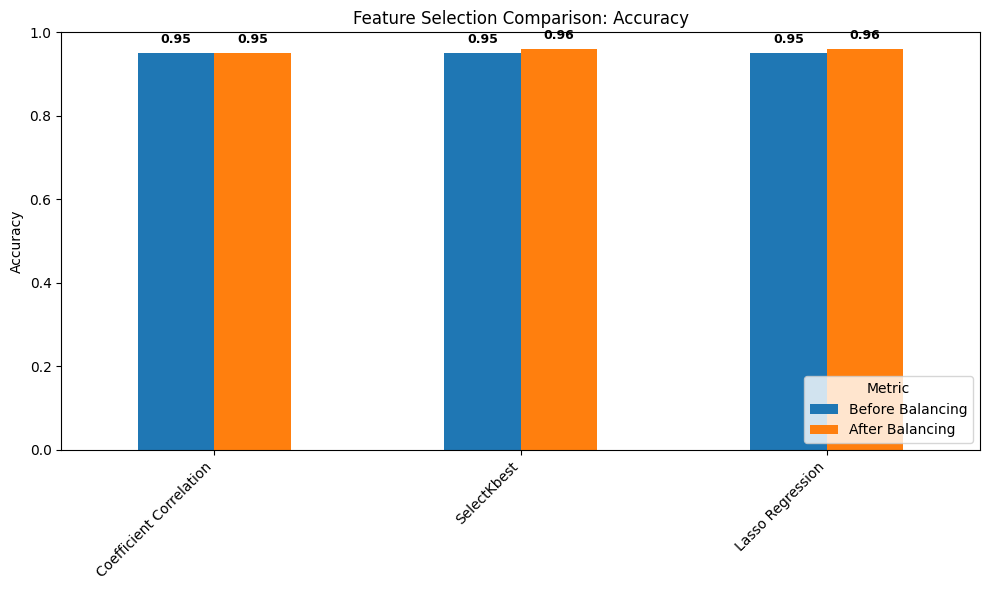

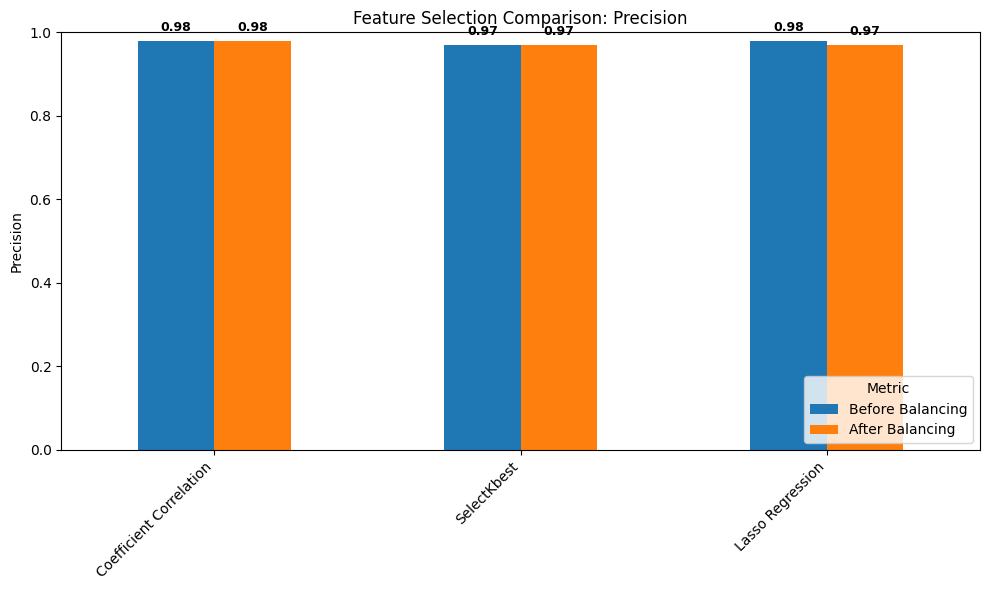

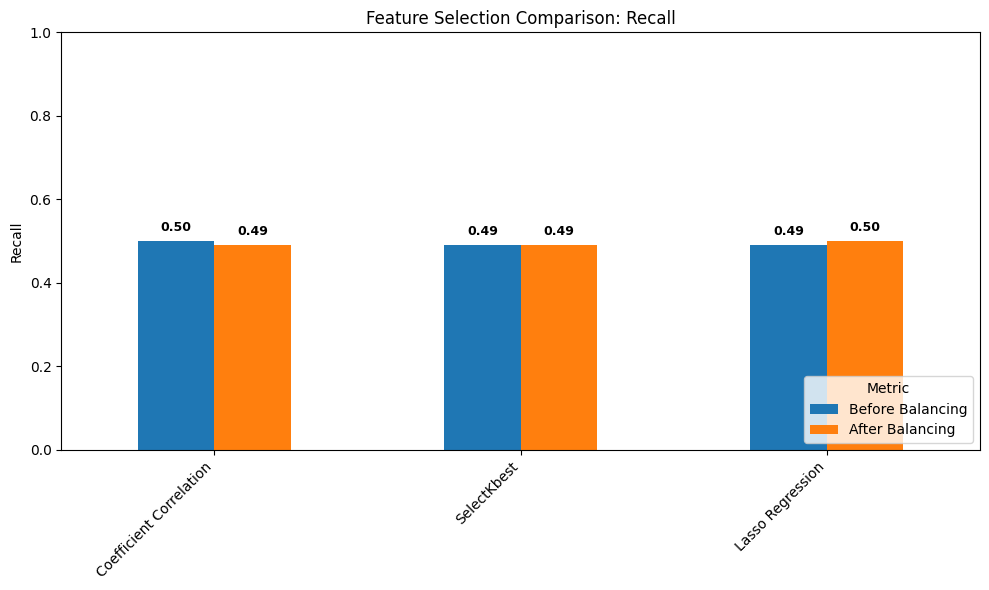

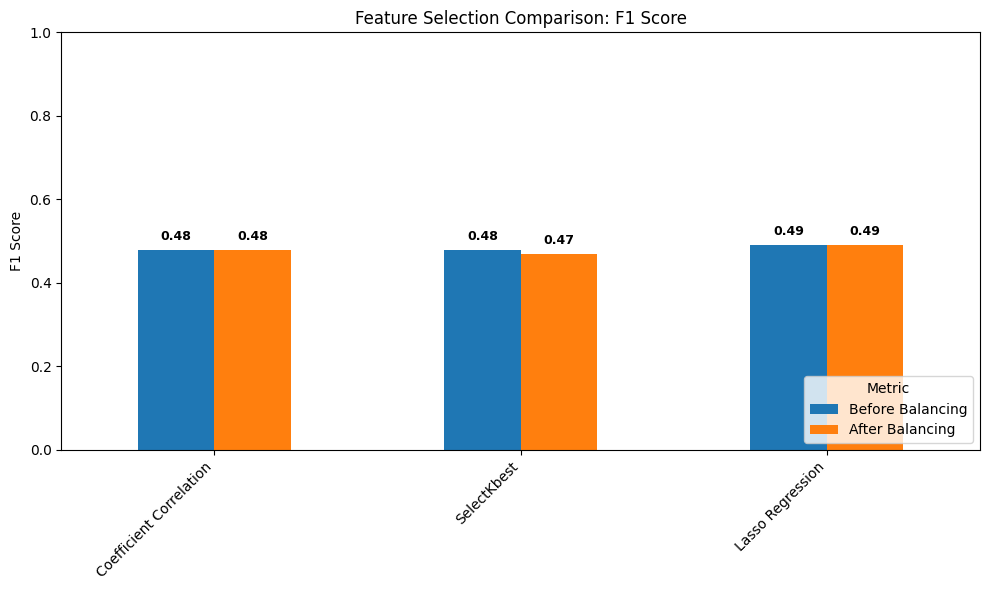

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot feature selection performance metrics
def plot_feature_selection_comparison(methods, metrics, metric_name, title):
    metrics_df = pd.DataFrame(metrics, index=methods, columns=['Before Balancing', 'After Balancing'])

    ax = metrics_df.plot(kind='bar', figsize=(10, 6))
    ax.set_title(title)
    ax.set_ylabel(metric_name)
    ax.set_ylim(0, 1)
    ax.set_xticklabels(methods, rotation=45, ha='right')

    # Annotate each bar with the metric value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold',
                    xytext=(0, 5), textcoords='offset points')

    # Position the legend at the lower right inside the plot
    ax.legend(title='Metric', loc='lower right', bbox_to_anchor=(1, 0))

    plt.tight_layout()
    plt.show()

# Feature selection method names
feature_selection_methods = ['Coefficient Correlation', 'SelectKbest', 'Lasso Regression']  # Replace Method 2 and 3 with actual names

# Replace these example metrics with actual performance results for each method
accuracy_before = [0.95, 0.95, 0.95]  # Update these lists with your actual data
accuracy_after = [0.95, 0.96, 0.96]

precision_before = [0.98, 0.97, 0.98]
precision_after = [0.98, 0.97, 0.97]

recall_before = [0.50, 0.49, 0.49]
recall_after = [0.49, 0.49, 0.50]

f1_before = [0.48, 0.48, 0.49]
f1_after = [0.48, 0.47, 0.49]

# Plot performance metrics for each feature selection method
plot_feature_selection_comparison(feature_selection_methods, list(zip(accuracy_before, accuracy_after)), 'Accuracy', 'Feature Selection Comparison: Accuracy')
plot_feature_selection_comparison(feature_selection_methods, list(zip(precision_before, precision_after)), 'Precision', 'Feature Selection Comparison: Precision')
plot_feature_selection_comparison(feature_selection_methods, list(zip(recall_before, recall_after)), 'Recall', 'Feature Selection Comparison: Recall')
plot_feature_selection_comparison(feature_selection_methods, list(zip(f1_before, f1_after)), 'F1 Score', 'Feature Selection Comparison: F1 Score')
